# Test `datasets`

In [1]:
import sys
sys.path.append('..')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pyod

## `X,y`

In [2]:
dataset = Dataset("wine", path = "../data/real/")
dataset.drop_duplicates()

In [3]:
from pyod.models.dif import DIF

dif_model = DIF()
for i in range(3):
    dif_model.fit(dataset.X)


/Users/alessio/.virtualenvs/venv/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:288: UserWarning: max_samples (256) is greater than the total number of samples (129). max_samples will be set to n_samples for estimation.
  warn(
/Users/alessio/.virtualenvs/venv/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:288: UserWarning: max_samples (256) is greater than the total number of samples (129). max_samples will be set to n_samples for estimation.
  warn(
/Users/alessio/.virtualenvs/venv/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:288: UserWarning: max_samples (256) is greater than the total number of samples (129). max_samples will be set to n_samples for estimation.
  warn(
/Users/alessio/.virtualenvs/venv/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:288: UserWarning: max_samples (256) is greater than the total number of samples (129). max_samples will be set to n_samples for estimation.
  warn(
/Users/alessio/.virtualenvs/venv/lib/python3.9/s

KeyboardInterrupt: 

In [32]:
I = ExtendedIsolationForest(1, n_estimators=100, max_depth=30)
I.fit(dataset.X)

In [7]:
I.avg_number_of_nodes

6122.52

In [3]:

from sklearn.metrics import average_precision_score
precisions = []
deviations = []
values_=[]
for d in range(100):
    I = ExtendedIsolationForest(1, n_estimators=100, max_depth=d)
    I.fit(dataset.X)
    precisions.append(average_precision_score(dataset.y, I.predict(dataset.X)))
    imp=I.global_importances(dataset.X)
    deviations.append(np.std(imp))
    values_.append(imp)


0it [00:00, ?it/s]Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x10f944670>
Traceback (most recent call last):
  File "/Users/alessio/.virtualenvs/venv/lib/python3.9/site-packages/llvmlite/binding/executionengine.py", line 171, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):
KeyboardInterrupt: 
100it [00:41,  2.39it/s]
/Users/alessio/Documents/ExIFFI/notebooks/../model_reboot/EIF_reboot.py:300: RuntimeWarning: invalid value encountered in divide
  return (outliers_importances/outliers_normals)/(inliers_importances/inliers_normals)
100it [00:00, 9632.11it/s]
100it [00:00, 1277.63it/s]
100it [00:00, 3796.82it/s]
100it [00:00, 5438.95it/s]
100it [00:00, 2746.51it/s]
100it [00:00, 4351.80it/s]
100it [00:00, 508.81it/s]
100it [00:00, 1126.99it/s]
100it [00:00, 1466.19it/s]
100it [00:00, 1806.10it/s]
100it [00:00, 1344.72it/s]
100it [00:00, 752.54it/s]
100it [00:00, 507.51it/s]
100it [00:00, 1097.63it/s

KeyboardInterrupt: 

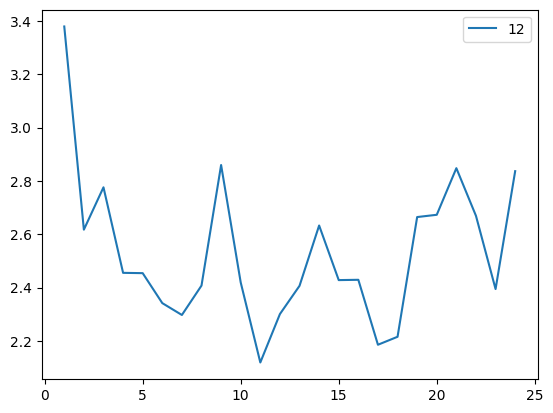

In [7]:
import matplotlib.pyplot as plt
# plt.plot(precisions)
# plt.plot(deviations)
for i in range(12,13):
    plt.plot([x[i] for x in values_[0:100]],label=str(i))
plt.legend()
plt.show()

In [34]:
print(12_)
np.std(I.global_importances(dataset.X))

0it [00:00, ?it/s]

100it [00:00, 817.12it/s]


[1.37616069 1.45433575 1.41724674 1.45072977 1.38055283 1.43747219
 1.4017655  1.37982971 1.4389898  1.50713838 1.38460577 1.42363938
 1.41836845]


100it [00:00, 998.09it/s]


0.036240194782634044

In [8]:
dif_model.decision_scores_

array([0.32370204, 0.31020521, 0.32663136, 0.32455299, 0.34409728,
       0.3088488 , 0.37344515, 0.31044738, 0.31257767, 0.31348678,
       0.35250615, 0.38477286, 0.34827564, 0.3286497 , 0.38747818,
       0.34435141, 0.30281624, 0.34978805, 0.35210064, 0.35222281,
       0.41087092, 0.30916565, 0.37614845, 0.33706403, 0.38068482,
       0.39674176, 0.32456198, 0.34921915, 0.29856177, 0.31184235,
       0.31806577, 0.33128089, 0.34384877, 0.32186876, 0.37856918,
       0.36606445, 0.32664802, 0.328958  , 0.32927542, 0.32399297,
       0.31438975, 0.34501336, 0.34010603, 0.37228866, 0.34541972,
       0.38378017, 0.32408241, 0.39845287, 0.32025195, 0.35266276,
       0.34794084, 0.35138621, 0.33568084, 0.31300203, 0.30546317,
       0.32215494, 0.39602   , 0.31326639, 0.32534448, 0.31381847,
       0.33658528, 0.37523751, 0.328167  , 0.37750206, 0.30932106,
       0.3089411 , 0.39619262, 0.32735377, 0.30736825, 0.31033868,
       0.30964242, 0.32920774, 0.36137896, 0.31275649, 0.32881

In [13]:
from utils_reboot.utils import *
path_experiment_matrices = "/Users/alessio/Documents/ExIFFI/experiments/results/wine/experiments/contamination/precisions"
precisions = open_element(get_most_recent_file(path_experiment_matrices))

In [17]:
precisions[1].shape

(11, 10, 13)

In [3]:
X_train,X_test,y_train,y_test = dataset.partition_data(dataset.X,dataset.y)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (119, 13)
X_test shape: (10, 13)
y_train shape: (119,)
y_test shape: (10,)


### `pre_process` with split

In [4]:
X_train,X_test,X,y=dataset.pre_process(X_train,X_test)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X shape: {X.shape}')

X_train shape: (119, 13)
X_test shape: (10, 13)
y_train shape: (119,)
y_test shape: (10,)
X shape: (129, 13)


In [5]:
X_train

array([[-0.38352175, -1.25265739, -3.38319954, ...,  0.57538935,
        -0.7627292 , -0.2922407 ],
       [-0.44214614, -1.12399951, -0.14889387, ...,  1.37230895,
        -0.98235682,  0.76964154],
       [ 0.01219289, -0.91493047, -1.06293677, ...,  0.29646749,
        -1.09949155, -0.75681418],
       ...,
       [ 0.93552704,  1.43307573, -0.21920486, ..., -1.25752574,
        -1.14341707,  1.79833997],
       [ 0.78896606,  0.07412694,  0.1675056 , ..., -1.21767976,
        -1.05556603,  1.83152379],
       [ 2.19595143,  1.28833562,  1.46825897, ..., -1.17783378,
        -1.08484971, -0.02677014]])

### `pre_process` without `split`

In [6]:
dataset.pre_process(X_train,X_test,split=False)

X_train not loaded. Load it running split_dataset() first


array([1.45570221, 0.97099082, 1.37818928, 1.7536564 , 1.49118793,
       1.51978639, 1.63866458, 1.07169841, 1.48211212, 1.10904872,
       1.03238004, 1.20685246, 1.66380843])

100it [00:00, 4527.14it/s]


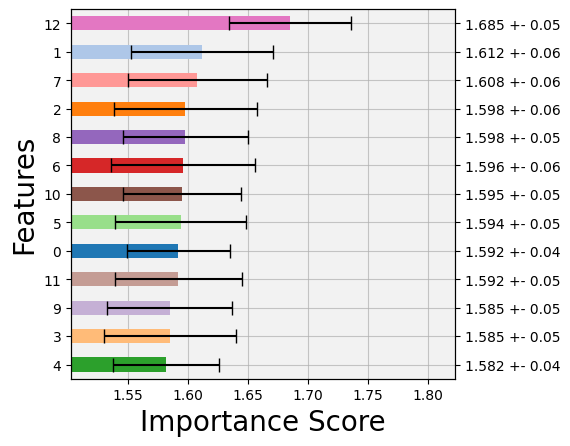

In [13]:
dataset.X.shape

## `X_train,y_train`

In [11]:
dataset.split_dataset()

In [12]:
X_train1,X_test1,y_train1,y_test1 = dataset.partition_data(dataset.X_train,dataset.y_train)
print(f'X_train shape: {X_train1.shape}')
print(f'X_test shape: {X_test1.shape}')
print(f'y_train shape: {y_train1.shape}')
print(f'y_test shape: {y_test1.shape}')

X_train shape: (93, 13)
X_test shape: (10, 13)
y_train shape: (93,)
y_test shape: (10,)


In [13]:
X_train,X_test,X,y=dataset.pre_process(X_train,X_test)

## Feature Names 

### `pima`

In [10]:
data=pd.read_csv('../data/real/pima.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### `moodify`

In [12]:
data=pd.read_csv('../data/real/moodify.csv')
data.head()

,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,Target
0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,0
1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,0
2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,0
3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,0


In [13]:
data.columns

Index(['Unnamed: 0', 'duration (ms)', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'spec_rate', 'Target'],
      dtype='object')

### `diabetes`

In [14]:
data=pd.read_csv('../data/real/diabetes.csv')
data.head()

,Unnamed: 0,age,bmi,HbA1c_level,blood_glucose_level,Target
0,0,80.0,25.19,6.6,140,0
1,1,54.0,27.32,6.6,80,0
2,2,28.0,27.32,5.7,158,0
3,3,36.0,23.45,5.0,155,0
4,4,76.0,20.14,4.8,155,0


In [15]:
data.columns

Index(['Unnamed: 0', 'age', 'bmi', 'HbA1c_level', 'blood_glucose_level',
       'Target'],
      dtype='object')

## Test `feature_ names`

In [4]:
dataset = Dataset("wine", path = "../data/real/")
dataset.feature_names

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [5]:
dataset = Dataset("pima", path = "../data/real/")
dataset.feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [6]:
dataset = Dataset("moodify", path = "../data/real/")
dataset.feature_names

['duration (ms)',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'spec_rate']

In [7]:
dataset = Dataset("diabetes", path = "../data/real/")
dataset.feature_names

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']